# Imports iniciais

In [1]:
! pip install pandas nltk transformers[torch] torch matplotlib seaborn wordcloud scikit-learn evaluate datasets

In [1]:
import pandas as pd
import random
import nltk # pip3 install nltk
from LSTM import *
from common import *

random.seed(42)
nltk.download('punkt')
nltk.download('stopwords')

c:\Users\bianc\Desktop\Chatbot-NLP\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bianc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bianc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
PATH_DATASET_NER = "../datasets/NER_dataset.json"

In [3]:
df = pd.read_json(PATH_DATASET_NER)
df.head()

,annotations
0,"[[De, jeito, nenhum.], [ENTITY_PREFERENCE, ENT..."
1,"[[Super-herói, de, ficção, científica], [ENTIT..."
2,"[[Eu, gosto], [ENTITY_PREFERENCE, ENTITY_PREFE..."
3,"[[Bem,, como, eu, disse, eu, eu, gosto, princi..."
4,"[[Sim,, absolutamente.], [ENTITY_PREFERENCE, E..."


In [4]:
ner_df = df["annotations"]

# Analisando o dataset

In [6]:
text_entries = []

for element in df.annotations:
    text_entries.append(element[0])

len(text_entries), text_entries[:10]

(104,
 [['De', 'jeito', 'nenhum.'],
  ['Super-herói', 'de', 'ficção', 'científica'],
  ['Eu', 'gosto'],
  ['Bem,',
   'como',
   'eu',
   'disse',
   'eu',
   'eu',
   'gosto',
   'principalmente',
   'de',
   'comédias',
   'porque',
   'tira',
   'minha',
   'mente',
   'das',
   'coisas',
   'do',
   'dia',
   'a',
   'dia',
   'e',
   'eu',
   'gosto',
   'dos',
   'documentários'],
  ['Sim,', 'absolutamente.'],
  ['filmes', 'de', 'comédia'],
  ['Eu',
   'realmente',
   'gosto',
   'de',
   'comédias',
   'e',
   'filmes',
   'de',
   'ficção',
   'científica'],
  ['claro', 'com', 'a', 'primeira', 'vez', 'que', 'Homem', 'de', 'Ferro'],
  ['Filmes',
   'como',
   'filmes',
   'de',
   'Adam',
   'Sandler',
   'ou',
   'filmes',
   'de',
   'Jim',
   'Carrey'],
  ['Eu',
   'gosto',
   'da',
   'história',
   'de',
   'uma',
   'família',
   'de',
   'super-heróis',
   'tentando',
   'levar',
   'uma',
   'vida',
   'normal',
   ',',
   'e',
   'eu',
   'gosto',
   'da',
   'animação.

In [7]:
conc_text = "\n".join([" ".join(entries) for entries in text_entries]).lower()
conc_text[:10]

'de jeito n'

In [8]:
tokenized_words = nltk.tokenize.word_tokenize(remove_punctuation(conc_text), language="portuguese")
tokenized_words[:10]

['de',
 'jeito',
 'nenhum',
 'superherói',
 'de',
 'ficção',
 'científica',
 'eu',
 'gosto',
 'bem']

In [9]:
stopwords_pt = nltk.corpus.stopwords.words('portuguese')
stopwords_pt[:10]

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as']

## Tamanho do vocabulário

In [10]:
print(f"O tamanho do vocabulário é {len(set(tokenized_words))}")

O tamanho do vocabulário é 443


## Tamanho das Sentenças

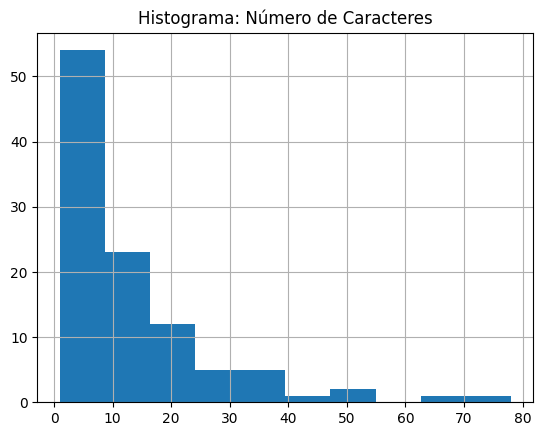

In [11]:
plot_hist([len(phrase) for phrase in text_entries], title="Histograma: Número de Caracteres")

In [12]:
plot_hist([len(nltk.tokenize.word_tokenize(remove_punctuation(phrase), language="portuguese")) for phrase in text_entries], "Histograma: Número de Tokens")

AttributeError: 'list' object has no attribute 'translate'

In [ ]:
plot_hist([len(tk) for tk in tokenized_words], "Histograma: Tamanho dos Tokens")

NameError: name 'plot_hist' is not defined

## Palavras mais comuns

In [ ]:
plot_most_frequent_word(tokenized_words, stopwords_pt)

NameError: name 'plot_most_frequent_word' is not defined

In [ ]:
cloud_of_words(conc_text, stopwords_pt)

NameError: name 'cloud_of_words' is not defined

# Separando o dataset

In [5]:
random.shuffle(ner_df)
ner_df[:3]

0    [[Eu, gosto, de, filmes, de, aventura], [ENTIT...
1    [[É, só, isso., Eu, não, sou, muito, fã, de, f...
2    [[Foi, Houve, muitos, super-heróis, e, ação, n...
Name: annotations, dtype: object

In [6]:
df_train = ner_df[:int(len(ner_df)*0.6)]
df_test = ner_df[int(len(ner_df)*0.6):int(len(ner_df)*0.8)]
df_val = ner_df[int(len(ner_df)*0.8):]

len(df_train), len(df_test), len(df_val)

(62, 21, 21)

# Treinando o Extrator

## LSTM

In [7]:
word_to_ix, tag_to_ix = one_hot_encoding_mapper(ner_df)

In [16]:
EMBEDDING_DIM = 32
HIDDEN_DIM = 16
OUTPUT_DIM = 5  # Número de tags de saída
NUM_EPOCHS = 100

In [17]:
model = train_lstm(NUM_EPOCHS, df_train, df_val, word_to_ix, tag_to_ix, EMBEDDING_DIM, HIDDEN_DIM)

Treinando LSTM no device cpu


  2%|▏         | 2/100 [00:00<00:06, 15.25it/s]

Epoch 1, Validation Loss: 1.4391574121656872
Epoch 2, Validation Loss: 1.3276747947647458
Epoch 3, Validation Loss: 1.2615800812130882


  4%|▍         | 4/100 [00:00<00:05, 17.01it/s]

Epoch 4, Validation Loss: 1.2151458462079365
Epoch 5, Validation Loss: 1.1839693131900968


  6%|▌         | 6/100 [00:00<00:05, 18.25it/s]

Epoch 6, Validation Loss: 1.1690844779922849
Epoch 7, Validation Loss: 1.1690947441827684


  8%|▊         | 8/100 [00:00<00:04, 18.62it/s]

Epoch 8, Validation Loss: 1.1802806173052107
Epoch 9, Validation Loss: 1.2008491470700218


 10%|█         | 10/100 [00:00<00:05, 16.65it/s]

Epoch 10, Validation Loss: 1.232724966037841
Epoch 11, Validation Loss: 1.273422964272045
Early stopping!


In [18]:
test_LSTM(model, word_to_ix, tag_to_ix, df_test)

Test Accuracy: 0.58984375
